# Edge Enhancing Coronal Loops

- https://docs.sunpy.org/en/stable/generated/gallery/computer_vision_techniques/loop_edge_enhance.html

How to edge enhance coronal loops in an SDO/AIA image.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE

We start with the sample data and crop it down to a region featuring coronal
loops.

In [ ]:
aia = sunpy.map.Map(AIA_171_IMAGE)
bottom_left = SkyCoord(750 * u.arcsec, -200 * u.arcsec, frame=aia.coordinate_frame)
top_right = SkyCoord(1500 * u.arcsec, 550 * u.arcsec, frame=aia.coordinate_frame)
aia_smap = aia.submap(bottom_left, top_right=top_right)

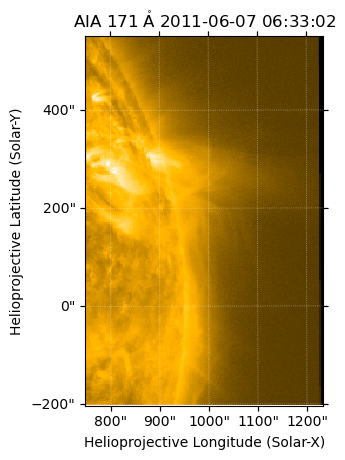

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia_smap)
aia_smap.plot(axes=ax)
plt.show()

Next we apply an edge enhance filter to the data in both x and y directions
and combine the two images together.

In [ ]:
sx = ndimage.sobel(aia_smap.data, axis=0, mode='constant')
sy = ndimage.sobel(aia_smap.data, axis=1, mode='constant')
edge_enhanced_im = np.hypot(sx, sy)

Finally we create a new map with the edge enhanced data.

In [ ]:
edge_map = sunpy.map.Map(edge_enhanced_im, aia_smap.meta)

Let's plot the results.

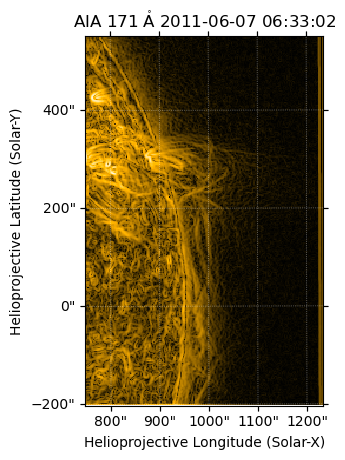

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=edge_map)
edge_map.plot(axes=ax)
plt.show()